# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bellampalli
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | la ronge
Processing Record 4 of Set 1 | itoman
Processing Record 5 of Set 1 | barentu
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | nemuro
Processing Record 10 of Set 1 | nizhnyaya poyma
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | buka
Processing Record 14 of Set 1 | acapulco de juarez
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | kuta
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bellampalli,19.0558,79.4930,25.26,84,97,2.46,IN,1726240600
1,adamstown,-25.0660,-130.1015,18.80,73,1,5.71,PN,1726240601
2,la ronge,55.1001,-105.2842,12.14,94,100,5.66,CA,1726240602
3,itoman,26.1247,127.6694,26.21,94,75,4.12,JP,1726240603
4,barentu,15.1139,37.5928,30.33,52,41,1.08,ER,1726240604


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bellampalli,19.0558,79.4930,25.26,84,97,2.46,IN,1726240600
1,adamstown,-25.0660,-130.1015,18.80,73,1,5.71,PN,1726240601
2,la ronge,55.1001,-105.2842,12.14,94,100,5.66,CA,1726240602
3,itoman,26.1247,127.6694,26.21,94,75,4.12,JP,1726240603
4,barentu,15.1139,37.5928,30.33,52,41,1.08,ER,1726240604


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

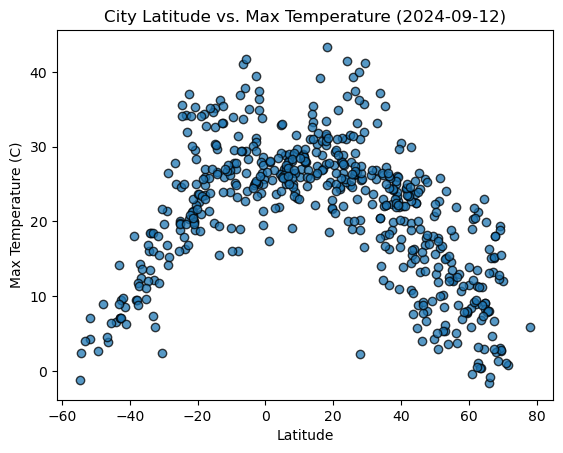

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-09-12)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

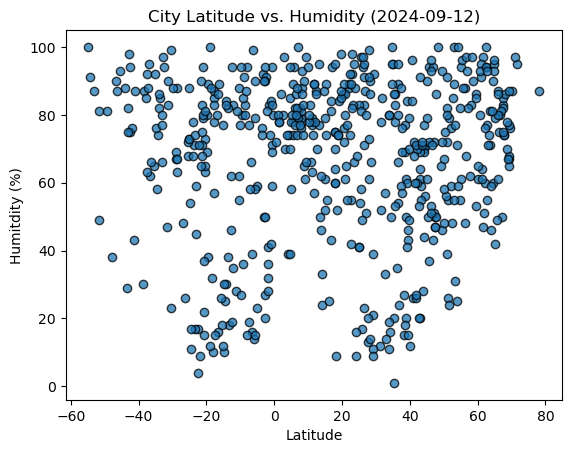

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-09-12)")
plt.xlabel("Latitude")
plt.ylabel("Humitdity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

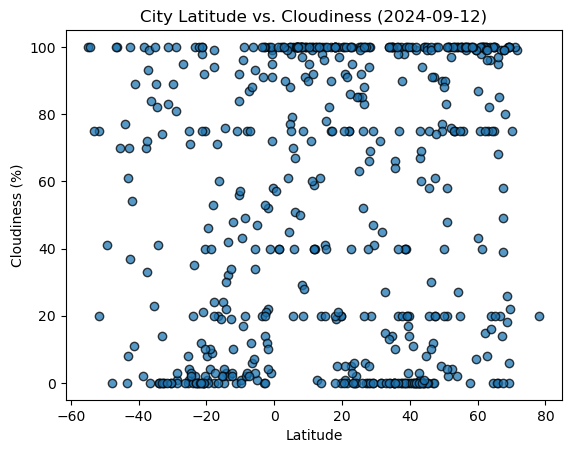

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-09-12)")
#plt.title(f"City Latitude vs. Cloudiness {pd.to_datetime(city_data_df["Date"][0], unit='s')}")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

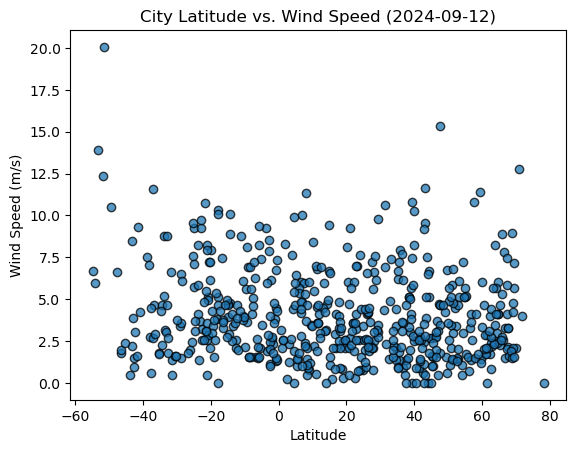

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-09-12)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_axis, y_axis, coords):
    
    # get the data from our data frame
    x_values = df[x_axis]
    y_values = df[y_axis]
    
    # get the values we need from linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r^2-value is: {rvalue**2}")
    
    # make the regression line
    reg_line = slope * x_values + intercept
    
    # plot the data given and the regression line and place the equasion on the graph
    plt.scatter(x_values, y_values)
    plt.plot(x_values, reg_line, color="red")
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(line_eq,coords,fontsize=15,color="red")

    # add labels and title
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f"{x_axis} vs. {y_axis}")
    
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bellampalli,19.0558,79.4930,25.26,84,97,2.46,IN,1726240600
2,la ronge,55.1001,-105.2842,12.14,94,100,5.66,CA,1726240602
3,itoman,26.1247,127.6694,26.21,94,75,4.12,JP,1726240603
4,barentu,15.1139,37.5928,30.33,52,41,1.08,ER,1726240604
7,nemuro,43.3236,145.5750,15.54,59,60,9.52,JP,1726240609


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,18.80,73,1,5.71,PN,1726240601
5,hermanus,-34.4187,19.2345,16.00,74,41,2.24,ZA,1726240606
6,margaret river,-33.9500,115.0667,13.50,82,0,5.16,AU,1726240608
10,ushuaia,-54.8000,-68.3000,-1.19,100,100,6.69,AR,1726240612
13,puerto ayora,-0.7393,-90.3518,21.42,94,95,4.47,EC,1726240615


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.5519982077256346


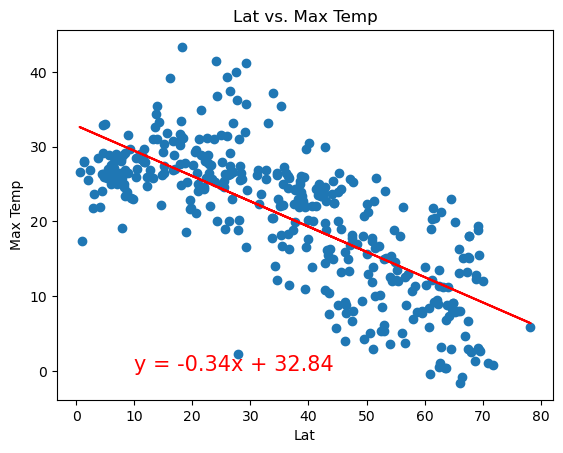

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp", (10,0))

The r^2-value is: 0.6041131573868876


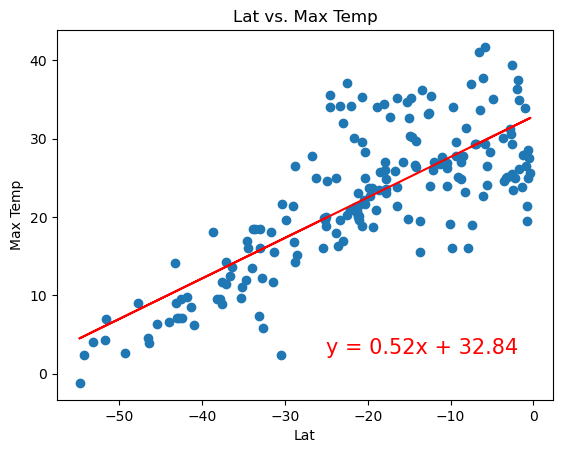

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp", (-25,2.5))

**Discussion about the linear relationship:** 
- The northern hemisphere has a strong negative correlation ($r^{2}$ above 0.5 or 50%) showing the further north you go from the equator the colder it gets.
- The southern hemisphere similarily has a strong positive correlation ($r^{2}$ above 0.5 or 50%) showing the further south you go from the equator the colder it gets.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00024335512512535878


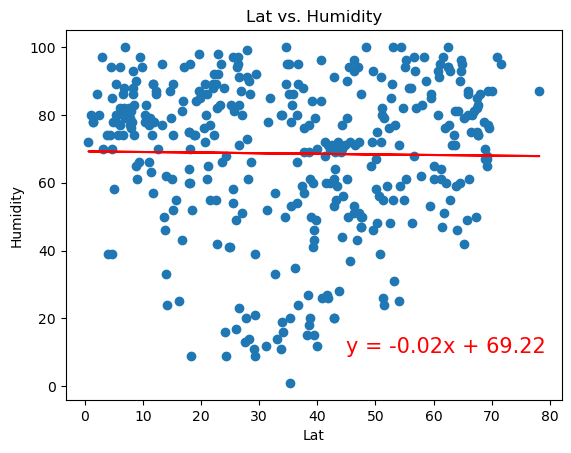

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Humidity", (45,10))

The r^2-value is: 0.04345015063176367


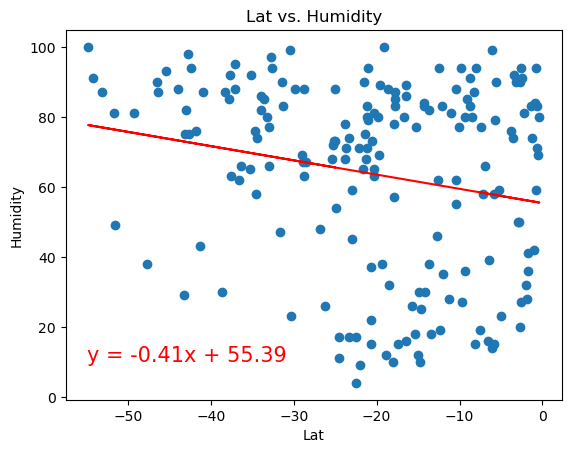

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Humidity",(-55,10))

**Discussion about the linear relationship:**
- These graphs show that there is a very weak correlation between Latitude and Humidity ($r^{2}$ both under .1 or 10%). This shows that Latitude has mostlikely very little to no effect on Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.005346948938679782


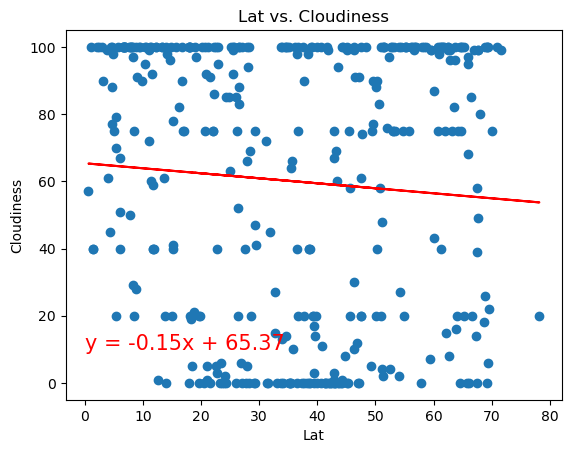

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness",(0,10))

The r^2-value is: 0.005368251790703489


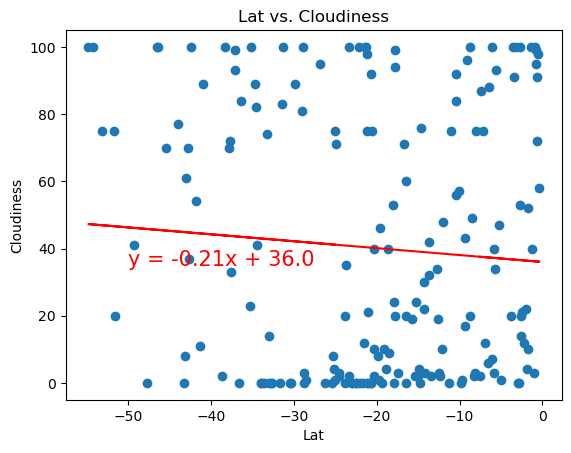

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness",(-50,35))

**Discussion about the linear relationship:** 
- These graphs show that there is a very weak correlation between Latitude and Cloudiness ($r^{2}$ both under .1 or 10%). This shows that Latitude has mostlikely very little to no effect on Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 1.2260682542730105e-05


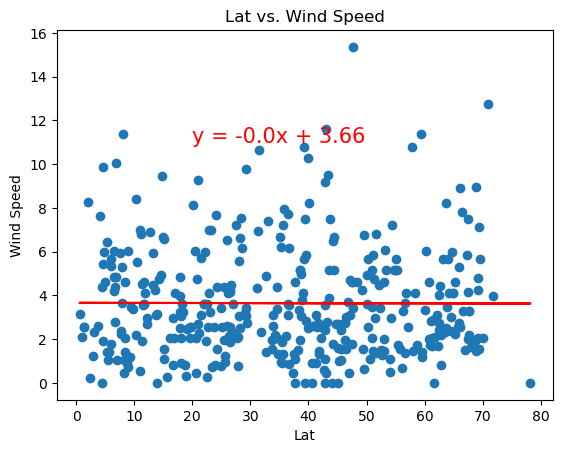

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed",(20,11))

The r^2-value is: 0.025884514019664868


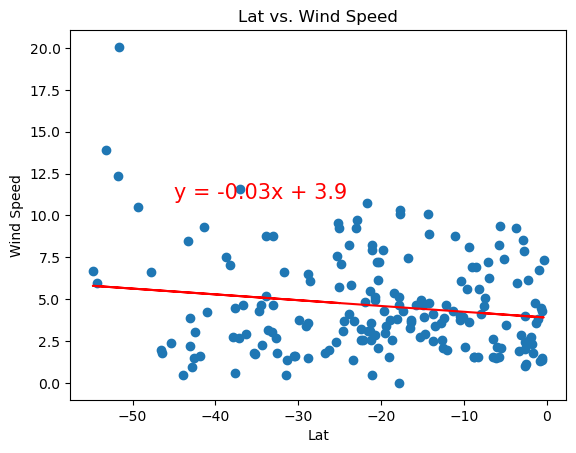

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed",(-45,11))

**Discussion about the linear relationship:** 
- These graphs show that there is a very weak correlation between Latitude and Wind Speed ($r^{2}$ both under .1 or 10%). This shows that Latitude has mostlikely very little to no effect on Wind Speed.